In [1]:
import climostripe
import pandas as pd

### First, let's check out some stations

In [2]:
stations = climostripe.station_lookup('SP')

### We want good data coverage, so we choose one of the stations at random... well not really...

In [9]:
stations_filtered = stations.query('datacoverage == 1 and mindate <  "1920-01-01"')

In [10]:
stations_filtered

,elevation,mindate,maxdate,latitude,name,datacoverage,id,elevationUnit,longitude
100,412.0,1913-08-06,2014-01-31,41.4181,"BARCELONA FABRA OBSERVATORY, SP",1.0,GHCND:SPE00155259,METERS,2.1239


In [11]:
climostripe.getdata?

Signature: climostripe.getdata(stationid, startyear, endyear)
Docstring:
This function grabs min and max daily temperature data for a chosen station from NOAA GHCND climate dataset.
It then calculates the average temperature over a chosen date range.

Parameters:
    - stationid:  A string of the GHCND station identifier (ex. GHCND:UK000000000)
    - startyear:  Integer of first year of date range (ex. 1900)
    - endyear:    Integer of last year of date range (ex. 2019)

Returns:
    Pandas dataframe of daily mean temperatures (TAvg)
File:      ~/git_repos/ATMS597_Project2/climostripe.py
Type:      function


In [12]:
climostripe.getdata(stations_filtered.id.values, 2010, 2011)

'Gathering data for 2011-01-01'

,TAvg
date,
2010-01-01,8.60
2010-01-02,6.10
2010-01-03,8.45
2010-01-04,7.20
2010-01-05,7.35
...,...
2011-12-27,10.20
2011-12-28,10.40
2011-12-29,9.15


## That took a long time... let's load in some data we downloaded previously!

## It is stored in the /data directory within the repo

In [13]:
df = climostripe.read_csv('data/barcelona_sp.csv')

In [15]:
df.head()

,TAvg
date,
1914-01-01,-1.7
1914-01-02,0.0
1914-01-03,0.5
1914-01-04,4.3
1914-01-05,4.3


In [16]:
df.tail()

,TAvg
date,
2013-12-27,10.00
2013-12-28,12.05
2013-12-29,8.30
2013-12-30,7.10
2013-12-31,8.75


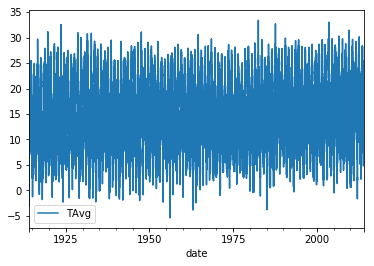

In [17]:
df.plot()

## That doesn't look nice... let's use Ed Hawkins'(s) method...
---

### Yearly

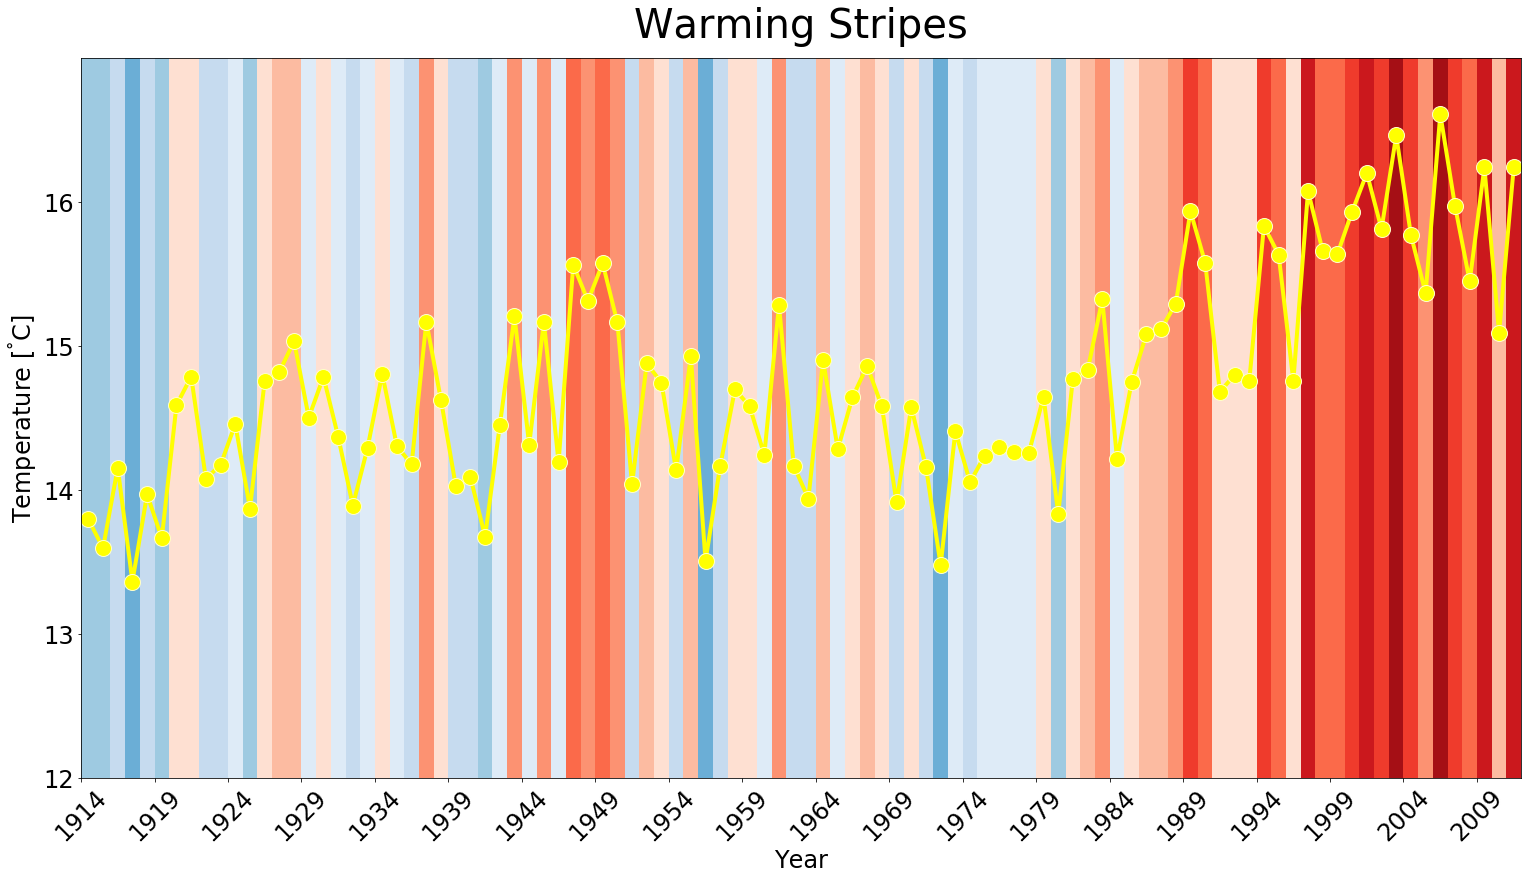

In [29]:
climostripe.plot(df, '1913-01-01', '2012-01-01', 'yearly')

### Monthly

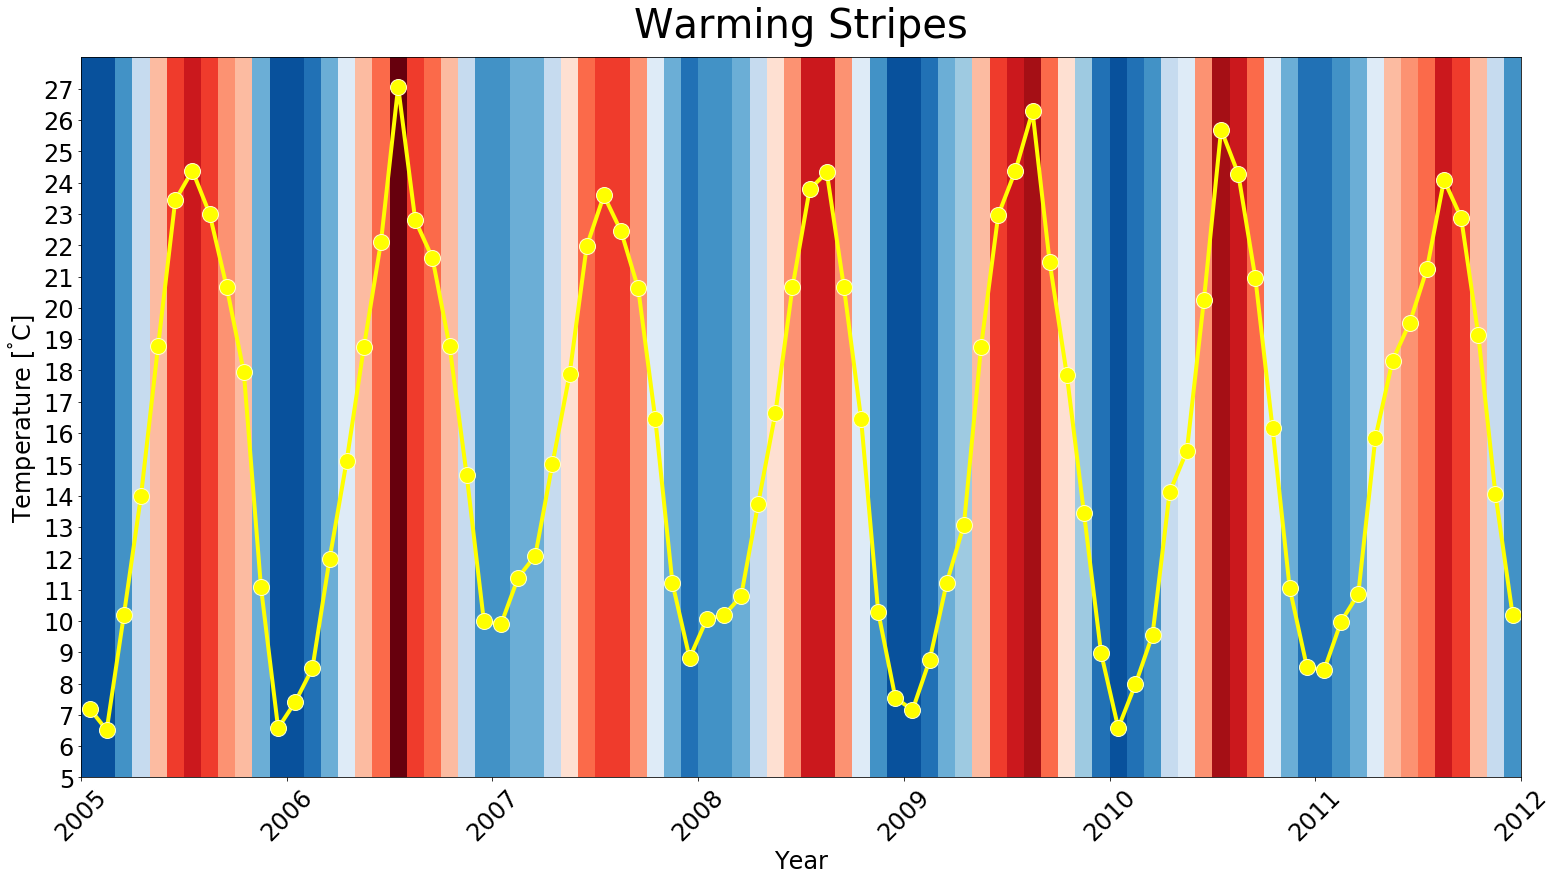

In [24]:
climostripe.plot(df, '2005-01-01', '2012-01-01', 'monthly')

### Weekly

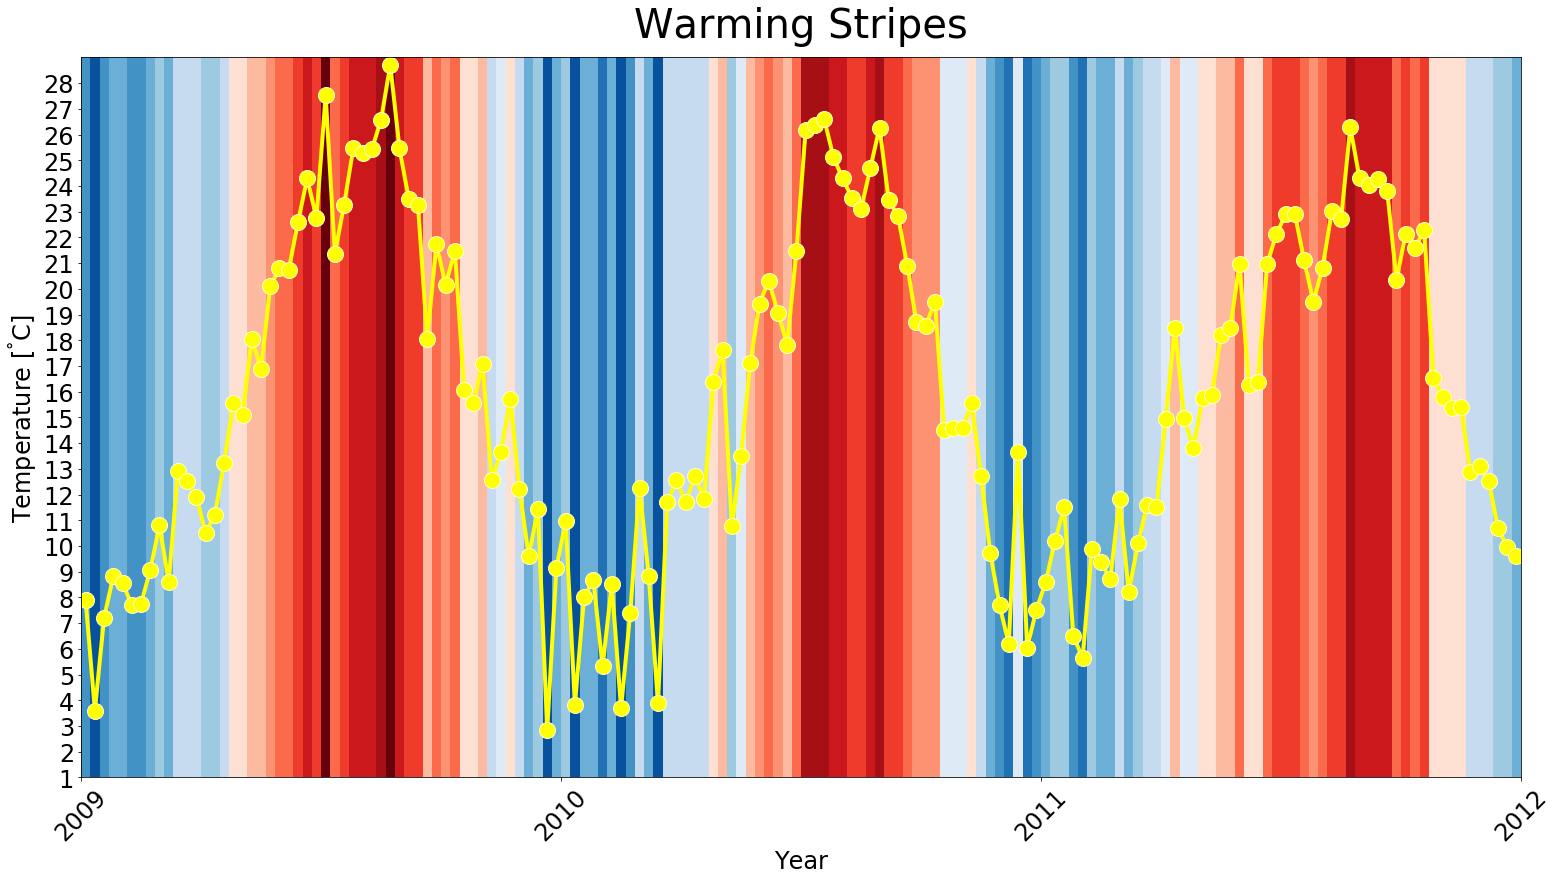

In [25]:
climostripe.plot(df, '2009-01-01', '2012-01-01', 'weekly')

## Don't forget the plot_line and savefig functionality